# Overall data analysis

In [1]:
import os
import subprocess
from matplotlib import pyplot
import pandas as pd
import numpy as np
%matplotlib inline

os.chdir("C:/Users/Admin/Downloads")
os.remove("./data.csv")
subprocess.run("wget -O data.csv https://usu.box.com/shared/static/o8rxnnzo4rkhrro0drs1k0oxi4lueyij", shell=True)
data = pd.read_csv("./data.csv",delimiter=",", header=0)

def rollingAverage(n, data):
    return np.convolve(data, np.ones(n), 'valid')/n

def dailyAverage(data):
    toReturn = []
    iterations = int(len(data)/24)
    for i in range(iterations):
        toReturn.append(np.mean(data[i * 24:(i + 1) * 24 - 1]))
    return toReturn

def countingSequence(n):
    toReturn = []
    for i in range(n):
        toReturn.append(i + 1)
    return toReturn

def integral(data, step=1):
    toReturn = []
    for i in range(0, len(data) - 1):
        toReturn.append(float(data[i + 1] - data[i])/step)
    return toReturn

def plot(data, title="Arbitrary Graph", xAxis="x", yAxis="y", save=False, loc="./fig.png", scatter=False):
    sequence = countingSequence(len(data))
    if scatter:
        pyplot.scatter(sequence, data)
    else:
        pyplot.plot(sequence, data)
    pyplot.xlabel(xAxis)
    pyplot.ylabel(yAxis)
    pyplot.title(title)
    dataMin = min(data)
    dataMax = max(data)
    if dataMin > 0:
        pyplot.ylim(bottom=0, top=(1.2 * dataMax))
    if save:
        pyplot.savefig(loc)
        pyplot.cla()

startOfData = 0
len(data[startOfData:len(data)])

310

# Straight data

Watering is in red, leaf trim is in purple.

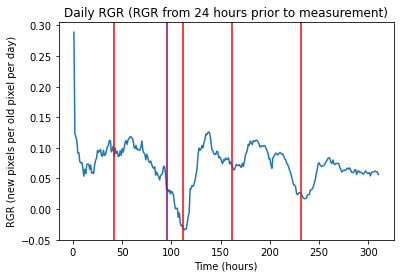

In [2]:
plot(data['Daily RGR'][startOfData:len(data)], 
    title="Daily RGR (RGR from 24 hours prior to measurement)",
    xAxis="Time (hours)",
    yAxis="RGR (new pixels per old pixel per day)")
pyplot.axvline(x=42 - startOfData, color="red")
pyplot.axvline(x=112 - startOfData, color="red")
pyplot.axvline(x=161 - startOfData, color="red")
pyplot.axvline(x=232 - startOfData, color="red")
pyplot.axvline(x=95 - startOfData, color="purple")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 3-point rolling average')

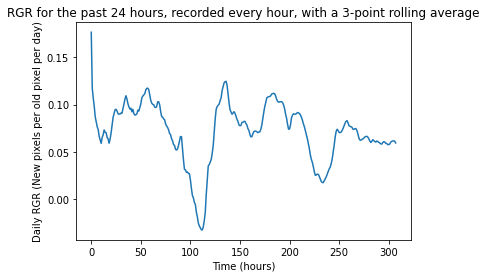

In [3]:
rollingDaily = rollingAverage(3, data['Daily RGR'][startOfData:len(data)])
pyplot.plot(rollingDaily)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 3-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 6-point rolling average')

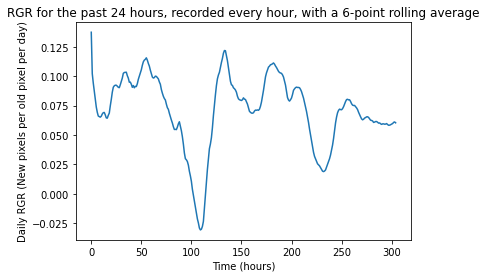

In [4]:
rolling3Hourly = rollingAverage(6, data['Daily RGR'][startOfData:len(data)])
pyplot.plot(rolling3Hourly)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 6-point rolling average")

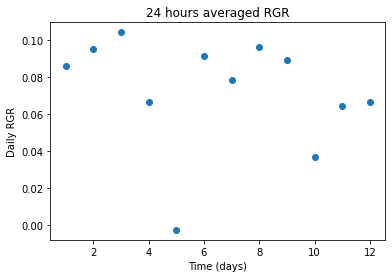

In [5]:
daily = dailyAverage(data['Daily RGR'][startOfData:len(data)])
plot(daily, xAxis="Time (days)", yAxis="Daily RGR", title="24 hours averaged RGR", scatter=True)

Text(0.5, 1.0, 'Daily RGR from the last 24 hours')

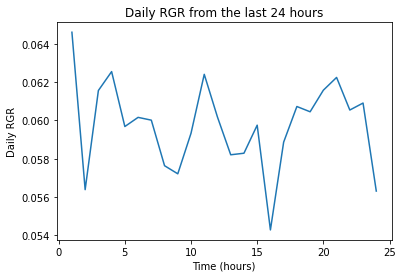

In [6]:
last24 = data["Daily RGR"][-24:len(data)]
sequence = countingSequence(len(last24))
pyplot.plot(sequence, last24)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR")
pyplot.title("Daily RGR from the last 24 hours")

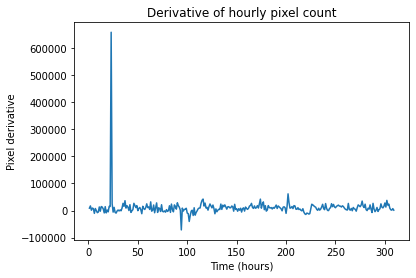

In [7]:
doi = data['Current White Pixels'][startOfData:len(data)].tolist()
integration = integral(doi)
plot(integration, title="Derivative of hourly pixel count", yAxis="Pixel derivative", xAxis="Time (hours)")

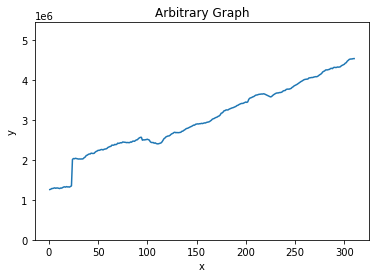

In [8]:
doi = data['Current White Pixels'][startOfData:len(data)]
plot(doi)